In [42]:
import pandas as pd #import pandas in to our code so we can use it

data1 = pd.read_csv('data/2021.csv') #our file path is just our file name
data2 = pd.read_csv('data/FantasyPros_2022_Overall_ADP_Rankings.csv') 

df = pd.merge(data1, data2, 
                   on = 'Player',
                   how ='left')
df.head(10)

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,FumblesLost,Rank,Team,Bye,POS,Yahoo,Fantrax,FFC,Sleeper,AVG
0,0,Jonathan Taylor,IND,RB,22,17,17,51.0,40.0,0.0,...,2.0,1.0,IND,14.0,RB1,1.0,1.0,1.0,1.0,1.0
1,1,Cooper Kupp,LAR,WR,28,17,17,191.0,145.0,0.0,...,0.0,3.0,LAR,7.0,WR1,2.0,3.0,4.0,5.0,3.5
2,2,Deebo Samuel,SFO,WR,25,16,15,121.0,77.0,24.0,...,2.0,18.0,SF,9.0,WR7,19.0,15.0,18.0,24.0,19.0
3,3,Josh Allen,BUF,QB,25,17,17,0.0,0.0,4407.0,...,3.0,23.0,BUF,7.0,QB1,20.0,27.0,23.0,21.0,22.8
4,4,Austin Ekeler,LAC,RB,26,16,16,94.0,70.0,0.0,...,3.0,2.0,LAC,8.0,RB2,3.0,2.0,3.0,4.0,3.0
5,5,Justin Herbert,LAC,QB,23,17,17,0.0,0.0,5014.0,...,1.0,37.0,LAC,8.0,QB3,36.0,41.0,38.0,36.0,37.8
6,6,Tom Brady,TAM,QB,44,17,17,0.0,0.0,5316.0,...,3.0,82.0,TB,11.0,QB10,60.0,93.0,91.0,85.0,82.3
7,7,Mark Andrews,BAL,TE,26,17,9,153.0,107.0,0.0,...,0.0,25.0,BAL,10.0,TE2,25.0,20.0,26.0,22.0,23.3
8,8,Ja'Marr Chase,CIN,WR,21,17,17,128.0,81.0,0.0,...,1.0,9.0,CIN,10.0,WR3,8.0,9.0,11.0,9.0,9.3
9,9,Justin Jefferson,MIN,WR,22,17,17,167.0,108.0,35.0,...,1.0,6.0,MIN,7.0,WR2,6.0,6.0,7.0,6.0,6.3


In [43]:
print(df.shape) # shape is an attribute that tells us the shape of our DataFrame in the format (rows, columns)
print('We have', df.shape[0], 'players we can analyze for the 2021 season')
print('We have', df.shape[1], 'columns of data we can analyze for the 2021 season')


(671, 30)
We have 671 players we can analyze for the 2021 season
We have 30 columns of data we can analyze for the 2021 season


In [44]:
df.columns

Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Tgt', 'Rec',
       'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds', 'RushingTD',
       'RushingAtt', 'ReceivingYds', 'ReceivingTD', 'FantasyPoints', 'Int',
       'Fumbles', 'FumblesLost', 'Rank', 'Team', 'Bye', 'POS', 'Yahoo',
       'Fantrax', 'FFC', 'Sleeper', 'AVG'],
      dtype='object')

In [45]:
draft_df = df[['Player', 'Tgt', 'Rec', 'ReceivingYds', 'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingTD', 'FantasyPoints', 'AVG']]

draft_df.head(10)

,Player,Tgt,Rec,ReceivingYds,RushingYds,RushingTD,RushingAtt,ReceivingTD,FantasyPoints,AVG
0,Jonathan Taylor,51.0,40.0,360.0,1811.0,18.0,332.0,2.0,333.0,1.0
1,Cooper Kupp,191.0,145.0,1947.0,18.0,0.0,4.0,16.0,295.0,3.5
2,Deebo Samuel,121.0,77.0,1405.0,365.0,8.0,59.0,6.0,262.0,19.0
3,Josh Allen,0.0,0.0,0.0,763.0,6.0,122.0,0.0,403.0,22.8
4,Austin Ekeler,94.0,70.0,647.0,911.0,12.0,206.0,8.0,274.0,3.0
5,Justin Herbert,0.0,0.0,0.0,302.0,3.0,63.0,0.0,381.0,37.8
6,Tom Brady,0.0,0.0,0.0,81.0,2.0,28.0,0.0,375.0,82.3
7,Mark Andrews,153.0,107.0,1361.0,0.0,0.0,1.0,9.0,194.0,23.3
8,Ja'Marr Chase,128.0,81.0,1455.0,21.0,0.0,7.0,13.0,224.0,9.3
9,Justin Jefferson,167.0,108.0,1616.0,14.0,0.0,6.0,10.0,222.0,6.3


# 2021 NFL Running Back Data

In [46]:
rb_df = df.loc[df['Pos'] == 'RB', ['Player', 'Tgt', 'RushingAtt', 'FantasyPoints', 'AVG']]
rb_df['Usage'] = df['Tgt'] + df['RushingAtt']
rb_df['Touchdowns'] = df['RushingTD'] + df['ReceivingTD']

In [47]:
rb_df.head(10) #RBs for 2021

,Player,Tgt,RushingAtt,FantasyPoints,AVG,Usage,Touchdowns
0,Jonathan Taylor,51.0,332.0,333.0,1.0,383.0,20.0
4,Austin Ekeler,94.0,206.0,274.0,3.0,300.0,20.0
10,Joe Mixon,48.0,292.0,246.0,9.8,340.0,16.0
13,Najee Harris,94.0,307.0,227.0,7.3,401.0,10.0
15,James Conner,39.0,202.0,221.0,31.8,241.0,18.0
21,Ezekiel Elliott,65.0,237.0,205.0,29.8,302.0,12.0
23,Nick Chubb,25.0,228.0,195.0,13.8,253.0,9.0
27,Damien Harris,21.0,202.0,192.0,60.8,223.0,15.0
31,Alvin Kamara,67.0,240.0,188.0,19.3,307.0,9.0
32,Antonio Gibson,52.0,258.0,187.0,38.0,310.0,10.0


In [48]:
rb_df['UsageRank'] = rb_df['Usage'].rank(ascending=False)

rb_df['FantasyPointsRank'] = rb_df['FantasyPoints'].rank(ascending=False)

rb_df.sort_values(by='UsageRank').head(15)

,Player,Tgt,RushingAtt,FantasyPoints,AVG,Usage,Touchdowns,UsageRank,FantasyPointsRank
13,Najee Harris,94.0,307.0,227.0,7.3,401.0,10.0,1.0,4.0
0,Jonathan Taylor,51.0,332.0,333.0,1.0,383.0,20.0,2.0,1.0
10,Joe Mixon,48.0,292.0,246.0,9.8,340.0,16.0,3.0,3.0
32,Antonio Gibson,52.0,258.0,187.0,38.0,310.0,10.0,4.0,10.5
31,Alvin Kamara,67.0,240.0,188.0,19.3,307.0,9.0,5.0,9.0
21,Ezekiel Elliott,65.0,237.0,205.0,29.8,302.0,12.0,6.0,6.0
4,Austin Ekeler,94.0,206.0,274.0,3.0,300.0,20.0,7.0,2.0
45,Dalvin Cook,49.0,249.0,172.0,7.8,298.0,6.0,8.0,15.5
46,Josh Jacobs,64.0,217.0,172.0,44.3,281.0,9.0,9.0,15.5
68,David Montgomery,51.0,225.0,153.0,33.5,276.0,7.0,10.0,20.0


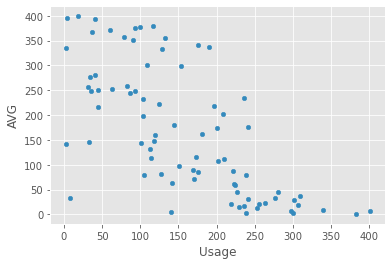

In [49]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

rb_df.plot(x='Usage', y='AVG', kind='scatter')

# 2021 NFL Wide Receiver Data

In [50]:
# Creating Wide Reciever DF 
wr_df = df.loc[df['Pos'] == 'WR', ['Player', 'Tgt', 'Rec', 'ReceivingYds', 'FantasyPoints', 'AVG']]
wr_df['Usage'] = df['Tgt'] + df['Rec']
rb_df['Touchdowns'] = df['RushingTD'] + df['ReceivingTD']

In [51]:
wr_df.head(10)

,Player,Tgt,Rec,ReceivingYds,FantasyPoints,AVG,Usage
1,Cooper Kupp,191.0,145.0,1947.0,295.0,3.5,336.0
2,Deebo Samuel,121.0,77.0,1405.0,262.0,19.0,198.0
8,Ja'Marr Chase,128.0,81.0,1455.0,224.0,9.3,209.0
9,Justin Jefferson,167.0,108.0,1616.0,222.0,6.3,275.0
11,Davante Adams,169.0,123.0,1553.0,221.0,11.5,292.0
16,Mike Evans,114.0,74.0,1035.0,189.0,25.0,188.0
18,Tyreek Hill,159.0,111.0,1239.0,186.0,21.8,270.0
20,Stefon Diggs,164.0,103.0,1225.0,183.0,12.8,267.0
24,Mike Williams,129.0,76.0,1146.0,171.0,49.3,205.0
25,D.K. Metcalf,129.0,75.0,967.0,169.0,NaN,204.0


In [52]:
wr_df.sort_values(by='AVG').head(15)

,Player,Tgt,Rec,ReceivingYds,FantasyPoints,AVG,Usage
1,Cooper Kupp,191.0,145.0,1947.0,295.0,3.5,336.0
9,Justin Jefferson,167.0,108.0,1616.0,222.0,6.3,275.0
8,Ja'Marr Chase,128.0,81.0,1455.0,224.0,9.3,209.0
11,Davante Adams,169.0,123.0,1553.0,221.0,11.5,292.0
20,Stefon Diggs,164.0,103.0,1225.0,183.0,12.8,267.0
38,CeeDee Lamb,120.0,79.0,1102.0,154.0,17.5,199.0
2,Deebo Samuel,121.0,77.0,1405.0,262.0,19.0,198.0
18,Tyreek Hill,159.0,111.0,1239.0,186.0,21.8,270.0
16,Mike Evans,114.0,74.0,1035.0,189.0,25.0,188.0
103,A.J. Brown,105.0,63.0,869.0,118.0,28.5,168.0
